### Import library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
import os
import torch

/root/anaconda3/envs/jm/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### OS Module

In [10]:
cur_dir = os.getcwd()                                                      #get current path
print(cur_dir)
file_list = os.listdir(cur_dir)                                            #get file list in directory
print(file_list)
tutorial_path = os.path.join(cur_dir, file_list[0])
print(tutorial_path)

# os.makedirs('./new_folder', exist_ok=True)
os.makedirs(os.path.join(cur_dir, 'new_folder'), exist_ok=True)                                             #create folder

cur_dir = os.getcwd()                                                      									#get current path
print(cur_dir)
file_list = os.listdir(cur_dir)                                            									#get file list in directory
print(file_list)
tutorial_path = os.path.join(cur_dir, file_list[0])
print(tutorial_path)

# os.makedirs('./new_folder', exist_ok=True)
os.makedirs(os.path.join(cur_dir, 'new_folder'), exist_ok=True)            									 #create folder

/mnt/f/Workspace/AILAB-isaac-sim-pick-place/lecture/1-1
['basic_tutorial.ipynb', 'debug_example.py', 'image_example.png', 'new_folder', 'practice_note.ipynb']
/mnt/f/Workspace/AILAB-isaac-sim-pick-place/lecture/1-1/basic_tutorial.ipynb


## Numpy

In [19]:
scores = [10, 50, 78, 90, 89, 54]
arr = np.array(scores)
print(type(scores))
print(type(arr))

<class 'list'>
<class 'numpy.ndarray'>


In [17]:
int_np = np.array([0,1,2,3,4], dtype=np.uint8)
float_np = np.array([0,1.1,2.2,3.3,4.4], dtype='float64')
print(int_np.dtype, float_np.dtype)

int2float = int_np.astype(dtype='float64')                                                                  #change data type
print(int2float.dtype)

uint8 float64
float64


In [20]:
scores_1 = [[34,56,23,89], 
            [11,45,76,34]]

second_arr = np.array(scores_1)

print(second_arr)
print(second_arr.shape)

[[34 56 23 89]
 [11 45 76 34]]
(2, 4)


In [22]:
ones = np.ones(5)
zeros = np.zeros((2,4))

print(ones)
print(zeros)

[1. 1. 1. 1. 1.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Numpy - calculation

In [30]:
ones_1 = np.ones((3,3))
ones_2 = np.ones((3,3))
tows = ones_1+ones_2

print(ones_1)
print(ones_2)
print(tows)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]


In [34]:
dot = ones_1 * ones_2
mat_mul = ones_1@ones_2
print(dot)

print(mat_mul)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]


[[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]


### Download test image from website

In [2]:
img_url = 'https://upload.wikimedia.org/wikipedia/ko/2/24/Lenna.png'
urllib.request.urlretrieve(img_url, './image_example.png')

('./image_example.png', <http.client.HTTPMessage at 0x7f6b5c6dbf70>)

### Read image with Opencv

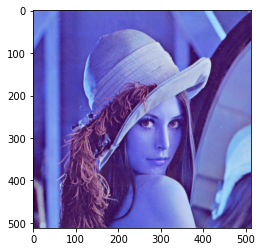

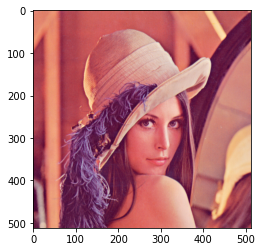

In [4]:
img_root = './image_example.png'
img = cv2.imread(img_root)
plt.imshow(img)
plt.show()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

### Check image detail

In [13]:
print(img.shape)
print(img.dtype)
print(np.max(img), np.min(img))

(512, 512, 3)
uint8
255 3


### Color shift using opencv

RGB image shape : (512, 512, 3)
BGR image shape : (512, 512, 3)
Gray image shape : (512, 512)
Gray image shape : (512, 512)


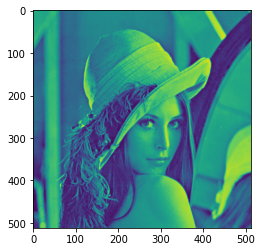

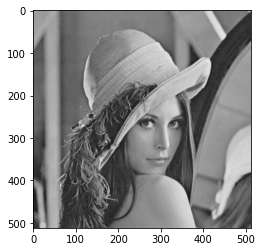

In [18]:
img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print("RGB image shape : {}".format(img.shape))
print("BGR image shape : {}".format(img_bgr.shape))
print("Gray image shape : {}".format(img_gray.shape))
img_gray2rgb = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB)
print("Gray image shape : {}".format(img_gray.shape))
plt.imshow(img_gray)
plt.show()
plt.imshow(img_gray2rgb)
plt.show()

### Multiple image visualization - matplotlib

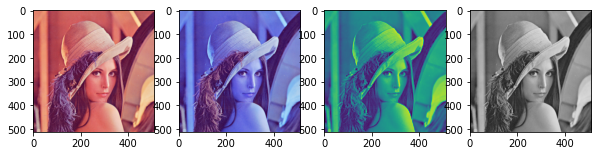

In [20]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 4, 1)
ax1.imshow(img)
ax2 = fig.add_subplot(1, 4, 2)
ax2.imshow(img_bgr)
ax3 = fig.add_subplot(1, 4, 3)
ax3.imshow(img_gray)
ax4 = fig.add_subplot(1, 4, 4)
ax4.imshow(img_gray2rgb)
plt.show()

### Multiple image visualization - opencv

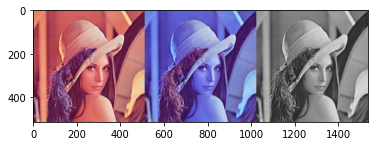

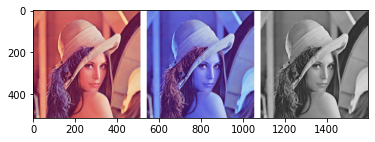

In [30]:
hcat = cv2.hconcat([img, img_bgr, img_gray2rgb])
plt.imshow(hcat)
plt.show()

pad = np.ones((img.shape[0], 30, 3)).astype(np.uint8) * 255
hcat_2 = cv2.hconcat([img, pad, img_bgr, pad, img_gray2rgb])
plt.imshow(hcat_2)
plt.show()

### Resize with opencv

oroginal image shape : (512, 512, 3)
resized image shape : (100, 100, 3)


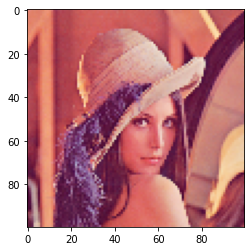

In [34]:
print("oroginal image shape : {}".format(img.shape))

img_s = cv2.resize(img, dsize=(100, 100))
print("resized image shape : {}".format(img_s.shape))
plt.imshow(img_s)
plt.show()

### Draw a rectangle and polygon in opencv

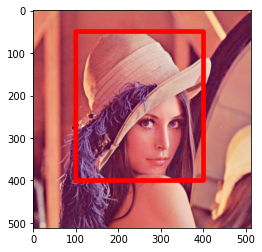

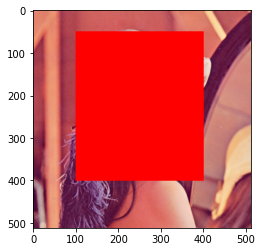

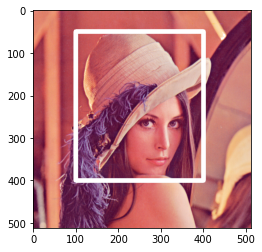

In [58]:
# draw rectangle

rectangle = cv2.rectangle(img.copy(), (100,50), (400,400), (255,0,0), 10) # (image, pt1, pt2. color, thickness)
plt.imshow(rectangle)
plt.show()

rectangle_fill = cv2.rectangle(img.copy(), (100,50), (400,400), (255,0,0), -1) # (image, pt1, pt2. color, thickness)
plt.imshow(rectangle_fill)
plt.show()
# change color red to white 
white = rectangle.copy()
white[white[:,:,0] == 255] = 255 
# or white[np.where((white == [255,0,0]).all(axis = 2))] = [255,255,255]
plt.imshow(white)
plt.show()

# Change color by pixel value
white_gray = cv2.cvtColor(white, cv2.COLOR_RGB2GRAY)
contours, _ = cv2.findContours(white_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#draw contours

### Image overay with opencv

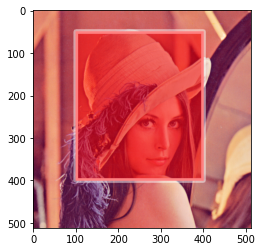

In [59]:
overlay  = cv2.addWeighted(white, 0.5, rectangle_fill, 0.5, 0)
plt.imshow(overlay)

### Draw Polygon with opencv

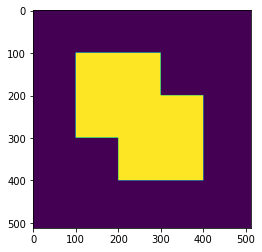

In [64]:
# generate example mask

mask = np.zeros(img.shape[:2], dtype = np.uint8)
mask[100:300, 100:300] = 255
mask[200:400, 200:400] = 255
plt.imshow(mask)
plt.imshow()

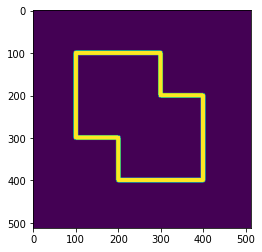

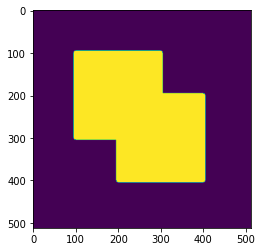

In [68]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
canvas = np.zeros_like(mask)
canvase= cv2.drawContours(canvas, contours, -1, (255,255,255), 10)
plt.imshow(canvas)
plt.show()

#generate polygon
canvase = cv2.drawContours(canvas, contours, -1, (255,255,255), -1)
plt.imshow(canvas)
plt.show()

### Manipulate data type

uint8 255


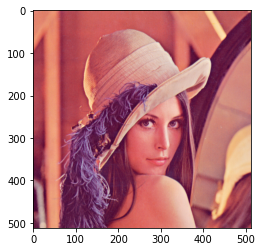

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


float32 255.0


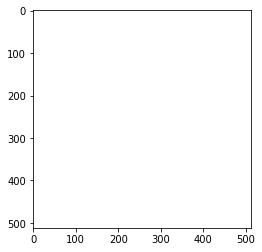

float32 1.0


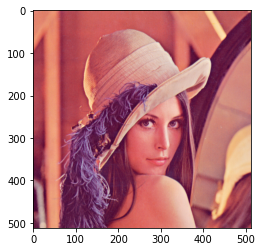

uint8 1


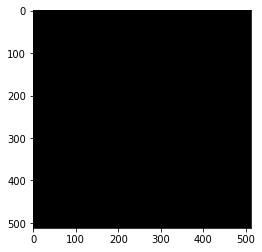

uint8 255


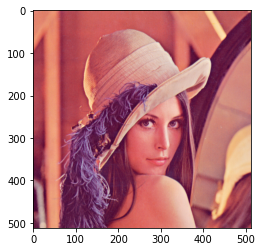

In [75]:
print(img.dtype, np.max(img))
plt.imshow(img)
plt.show()

img_float = img.astype(np.float32)
print(img_float.dtype, np.max(img_float))
plt.imshow(img_float)
plt.show()

img_float /= 255
print(img_float.dtype, np.max(img_float))
plt.imshow(img_float)
plt.show()

float2int = img_float.astype(np.uint8)
print(float2int.dtype, np.max(float2int))
plt.imshow(float2int)
plt.show()

float2int = (img_float * 255).astype(np.uint8)
print(float2int.dtype, np.max(float2int))
plt.imshow(float2int)
plt.show()


### Pillow

In [7]:
img_pil = Image.open(img_root)
print(type(img_pil))
print(img_pil.size)
img_pil.show()

<class 'PIL.PngImagePlugin.PngImageFile'>
(512, 512)


### CV(numpy) to Pillow

<class 'numpy.ndarray'>


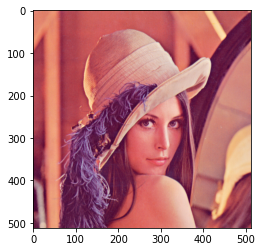

<class 'PIL.Image.Image'>


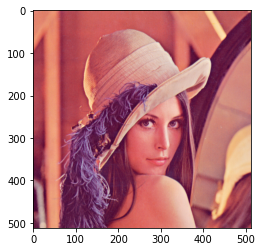

In [10]:
pil2np = np.array(img_pil)
print(type(pil2np))
plt.imshow(pil2np)
plt.show()

np2pil = Image.fromarray(img)
print(type(np2pil))
np2pil.show()
plt.imshow(np2pil)
plt.show()
# display(np2pil)

### Tensor

In [1]:
import torch

### Numpy to Tensor

In [6]:
img_torch = torch.from_numpy(img)

print(type(img_torch))
print(img_torch.shape)
print(img_torch.dtype)
print(img_torch.max())

<class 'torch.Tensor'>
torch.Size([512, 512, 3])
torch.uint8
tensor(255, dtype=torch.uint8)


In [11]:
from torchvision import transforms

transform = transforms.ToTensor()
img_torch = transform(np2pil)

print(type(img_torch))
print(img_torch.shape)
print(img_torch.dtype)
print(img_torch.max())

<class 'torch.Tensor'>
torch.Size([3, 512, 512])
torch.float32
tensor(1.)


### Change Data type - Tensor

In [15]:
print(img_torch.dtype)

img_torch_float = img_torch.to(dtype = torch.uint8)
print(img_torch_float.dtype)

torch.float32
torch.uint8


### Concat dimension - Tensor

In [29]:
img_torch2  = img_torch.clone().detach()

print(img_torch2.shape)
concat = torch.cat([img_torch, img_torch2], dim = 0)
concat.shape

torch.Size([3, 512, 512])


torch.Size([6, 512, 512])

torch.Size([3, 512, 512])